In [253]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [254]:
results_df = pd.read_csv('auction_detailed_log.csv')
print(results_df.columns)

Index(['ItemNumber', 'ItemTime', 'BidAmount', 'Patience'], dtype='object')


In [255]:
results_df

,ItemNumber,ItemTime,BidAmount,Patience
0,1,28.3,141.96,NaN
1,1,40.8,149.06,NaN
2,1,41.8,156.51,NaN
3,1,44.9,164.34,NaN
4,1,53.1,172.56,NaN
...,...,...,...,...
8475,1001,38.9,311.73,NaN
8476,1001,50.8,327.32,NaN
8477,1001,56.7,343.69,NaN
8478,1001,58.5,360.87,NaN


In [256]:
# Calculate the average number of bids
aggregated_items = results_df.groupby('ItemNumber').size().reset_index(name='count')

aggregated_items.head()

,ItemNumber,count
0,1,12
1,2,7
2,3,13
3,4,8
4,5,8


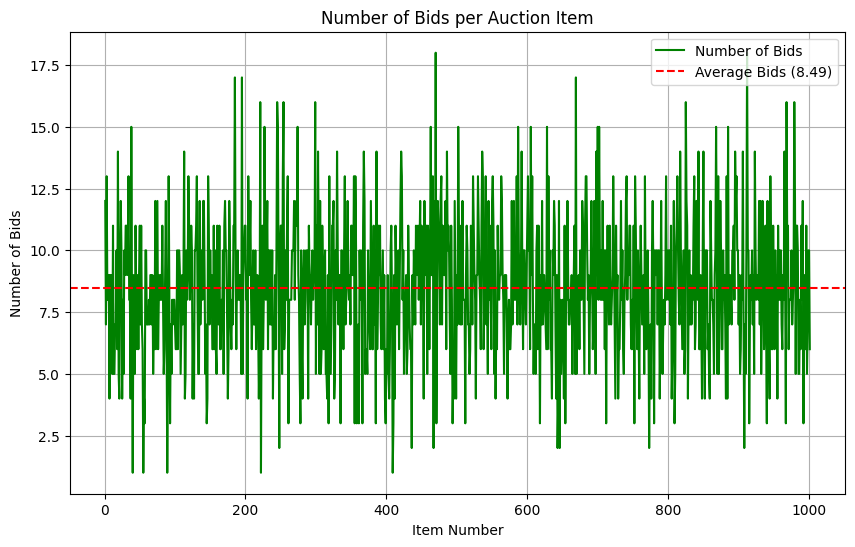

In [257]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(aggregated_items['ItemNumber'], aggregated_items['count'], color="green", label='Number of Bids')

# Calculate the average number of bids
average_bids = aggregated_items['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Count'>

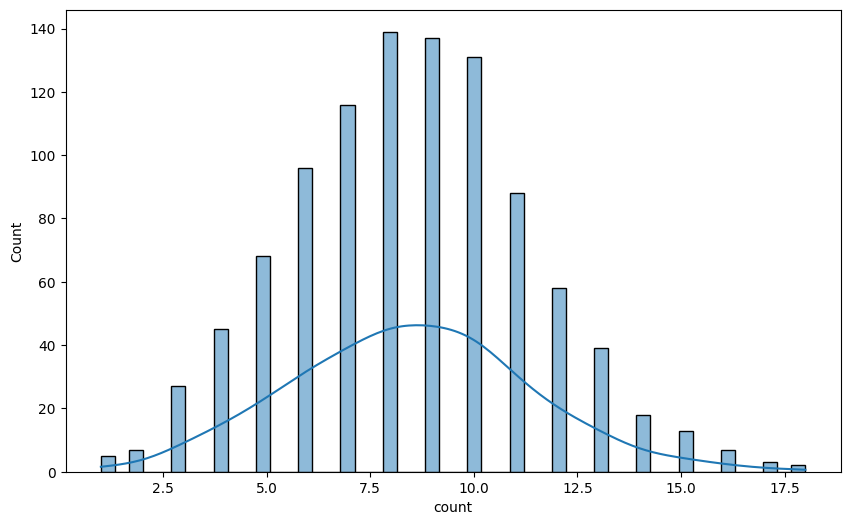

In [258]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(aggregated_items['count'], bins=50, kde=True, ax=axs)

In [259]:
time_aggregated = results_df.groupby('ItemTime').size().reset_index(name='count')
time_aggregated

,ItemTime,count
0,2.1,1
1,3.1,1
2,3.3,1
3,3.5,1
4,3.8,1
...,...,...
522,59.6,46
523,59.7,48
524,59.8,45
525,59.9,30


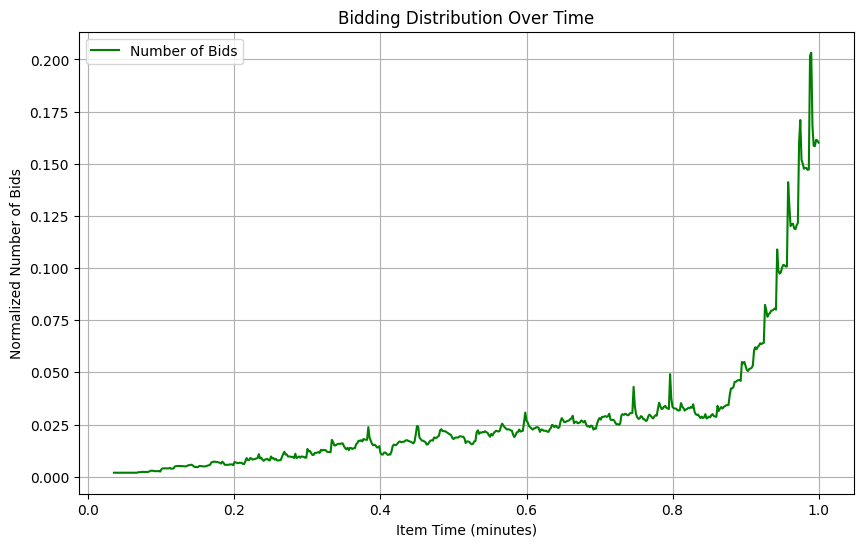

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming time_aggregated is already defined and contains 'ItemTime' and 'count' columns

# Calculate the rolling average to smooth the data
time_aggregated['smoothed_count'] = time_aggregated['count'].rolling(window=10, min_periods=1).mean()

# Bidding distribution in the auction
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

normalizer = len(time_aggregated)

# Plotting the data as a line plot with smoothed data
axs.plot(time_aggregated['ItemTime'] / 60, time_aggregated['smoothed_count'] / normalizer, color="green", label='Number of Bids')

# Adding labels and title
axs.set_xlabel('Item Time (minutes)')
axs.set_ylabel('Normalized Number of Bids')
axs.set_title('Bidding Distribution Over Time')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()